# Spotify Machine Learning

In [1]:
# Libraries

%matplotlib inline

import json

import pandas as pd
from pandas.io.json import json_normalize

import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
# Import JSON files

with open("top_tracks_attributes.json") as f:
    top_tracks_json = json.load(f)
    
with open("pop_tracks_attributes.json") as f:
    genre_tracks_json = json.load(f)
    
# with open
    
top_tracks = json_normalize(top_tracks_json)
top_tracks['rank'] = range(1, len(top_tracks) + 1)

genre_tracks = json_normalize(genre_tracks_json)

## Characteristics to Analyze

1. acousticness
2. danceability
3. energy
4. instrumentalness
5. liveness
6. loudness
7. speechiness
8. valence

Predicting: rank

Assume all attributes of are equal weight initially.

In [3]:
train = top_tracks.sample(frac=.8)
test = top_tracks.drop(train.index)

In [4]:
train

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,rank
40,0.001210,https://api.spotify.com/v1/audio-analysis/2MVw...,0.504,211080,0.7050,2MVwrvjmcdt4MsYYLCYMt8,0.000004,6,0.4530,-6.179,0,0.0665,108.965,4,https://api.spotify.com/v1/tracks/2MVwrvjmcdt4...,audio_features,spotify:track:2MVwrvjmcdt4MsYYLCYMt8,0.5670,41
1,0.150000,https://api.spotify.com/v1/audio-analysis/5HNC...,0.472,382297,0.3660,5HNCy40Ni5BZJFw1TKzRsC,0.308000,11,0.0837,-12.595,0,0.0286,127.167,4,https://api.spotify.com/v1/tracks/5HNCy40Ni5BZ...,audio_features,spotify:track:5HNCy40Ni5BZJFw1TKzRsC,0.1710,2
48,0.031100,https://api.spotify.com/v1/audio-analysis/2jt2...,0.939,337941,0.5510,2jt2WxXMCD4zjACthkJQVE,0.000000,1,0.1920,-9.126,1,0.2910,118.552,4,https://api.spotify.com/v1/tracks/2jt2WxXMCD4z...,audio_features,spotify:track:2jt2WxXMCD4zjACthkJQVE,0.4200,49
45,0.186000,https://api.spotify.com/v1/audio-analysis/5FVd...,0.548,272394,0.5320,5FVd6KXrgO9B3JPmC8OPst,0.000263,5,0.2170,-7.596,1,0.0323,85.030,4,https://api.spotify.com/v1/tracks/5FVd6KXrgO9B...,audio_features,spotify:track:5FVd6KXrgO9B3JPmC8OPst,0.4050,46
39,0.087900,https://api.spotify.com/v1/audio-analysis/0RIL...,0.428,228147,0.4290,0RILico3Gbl5jxSNg3zLrJ,0.000410,0,0.1680,-6.060,1,0.0490,127.173,4,https://api.spotify.com/v1/tracks/0RILico3Gbl5...,audio_features,spotify:track:0RILico3Gbl5jxSNg3zLrJ,0.1820,40
30,0.002550,https://api.spotify.com/v1/audio-analysis/2aoo...,0.438,240800,0.8050,2aoo2jlRnM3A0NyLQqMN2f,0.000057,8,0.0842,-6.237,1,0.0624,113.253,4,https://api.spotify.com/v1/tracks/2aoo2jlRnM3A...,audio_features,spotify:track:2aoo2jlRnM3A0NyLQqMN2f,0.5640,31
37,0.000006,https://api.spotify.com/v1/audio-analysis/0Wvk...,0.463,219280,0.8860,0Wvkn2BWi5Phu0pwb3bJ3E,0.007700,9,0.0979,-4.248,1,0.0487,131.904,4,https://api.spotify.com/v1/tracks/0Wvkn2BWi5Ph...,audio_features,spotify:track:0Wvkn2BWi5Phu0pwb3bJ3E,0.4870,38
22,0.048300,https://api.spotify.com/v1/audio-analysis/086m...,0.691,161124,0.6310,086myS9r57YsLbJpU0TgK9,0.000011,2,0.1040,-6.478,1,0.0368,92.004,4,https://api.spotify.com/v1/tracks/086myS9r57Ys...,audio_features,spotify:track:086myS9r57YsLbJpU0TgK9,0.8000,23
20,0.735000,https://api.spotify.com/v1/audio-analysis/6mFk...,0.481,334744,0.2620,6mFkJmJqdDVQ1REhVfGgd1,0.011400,7,0.8320,-15.730,1,0.0414,122.883,4,https://api.spotify.com/v1/tracks/6mFkJmJqdDVQ...,audio_features,spotify:track:6mFkJmJqdDVQ1REhVfGgd1,0.3750,21
7,0.250000,https://api.spotify.com/v1/audio-analysis/3ieD...,0.441,292080,0.5600,3ieDOGcOqVxScs2VZBzidt,0.029600,0,0.1510,-13.681,1,0.0361,166.585,4,https://api.spotify.com/v1/tracks/3ieDOGcOqVxS...,audio_features,spotify:track:3ieDOGcOqVxScs2VZBzidt,0.4760,8


In [5]:
X_train = train[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]
y_train = train['rank']
X_test = test[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]
y_test = test['rank']

In [6]:
# this it the API's way of standardizing the data into scalar form
scaler = StandardScaler()

# This determines which data set to standardize with respect to.
scaler.fit(X_train)

# Now we need to standardize both the training and test sets with
# respect to the training data.
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## Find Optimal K-Value

In [7]:
def get_Kneighbors_test_error(k):
    scaler = StandardScaler()
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([('transform', scaler), ('fit', model)])
    return np.sqrt(np.abs(cross_val_score(pipeline, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean()))

In [8]:
ks = pd.Series(range(1, 30, 1))
ks.index = ks

k_cross_val = ks.apply(get_Kneighbors_test_error)

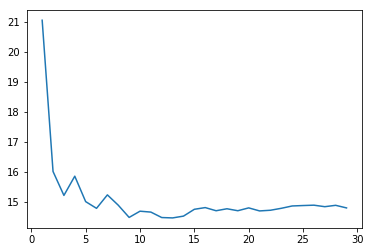

In [9]:
k_cross_val.plot()
k = k_cross_val.idxmin()

## K-nearest Neighbors Analysis

In [10]:
scaler = StandardScaler()
model = KNeighborsRegressor(n_neighbors= k)
pipeline = Pipeline([('transform', scaler), ('fit', model)])
np.sqrt(np.abs(cross_val_score(pipeline, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean()))

14.455614580480773

In [11]:
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_test_pred

array([25.84615385, 29.69230769, 26.15384615, 29.69230769, 28.69230769,
       24.38461538, 24.38461538, 24.61538462, 29.07692308, 29.15384615])

In [12]:
genre_test = genre_tracks[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]

In [15]:
ranked_indices = genre_test.join(pd.Series(model.predict(genre_test)).rename("predicted_rank")).sort_values("predicted_rank").index.tolist()

In [23]:
genre_tracks.loc[ranked_indices, 'id'].tolist()

['18uwL0vNUanqZH0ro2QcOP',
 '5aqu5xhPqoOWqF71PkfgM8',
 '7oOOI85fVQvVnK5ynNMdW7',
 '04sN26COy28wTXYj3dMoiZ',
 '4h0zU3O9R5xzuTmNO7dNDU',
 '6fFTPGGItuEpjwXRUIr4rk',
 '1tT55K6VEyO6XFDxK4lDQe',
 '4eSGSqP2TZvvX0kadZZttM',
 '7vRriwrloYVaoAe3a9wJHe',
 '0utlOiJy2weVl9WTkcEWHy',
 '047fCsbO4NdmwCBn8pcUXl',
 '7wC5eZcFS1Q1BsQ35DU6H4',
 '7tGEAA1f8MydT7eVbbO9Zy',
 '7bdYxWPCs46dQ0XLwySOyv',
 '4S7YHmlWwfwArgd8LfSPud',
 '2VlLbhGLVJgdOW7kKdWWFc',
 '7wvwXi9Z66dcH5t202vVkN',
 '1fewSx2d5KIZ04wsooEBOz',
 '46eu3SBuFCXWsPT39Yg3tJ',
 '6LyAwkJsHlW7RQ8S1cYAtM',
 '7DfFc7a6Rwfi3YQMRbDMau',
 '7uKcScNXuO3MWw6LowBjW1',
 '5a1iz510sv2W9Dt1MvFd5R',
 '5w7wuzMzsDer96KqxafeRK',
 '5tsI3xxDHDgzHhn30LTQNz',
 '4at3d5QWnlibMVN75ECDrp',
 '16qYlQ6koFxYVbiJbGHblz',
 '6I6NX6tjGsxFAsIfGzY9lJ',
 '2JvzF1RMd7lE3KmFlsyZD8',
 '5mCPDVBb16L4XQwDdbRUpz',
 '152lZdxL1OR0ZMW6KquMif',
 '1Jl21sidRpEdlVBvYbssLx',
 '29H8RkqW9GaFy8tdjriuX3',
 '2MShy1GSSgbmGUxADNIao5',
 '4JuZQeSRYJfLCqBgBIxxrR',
 '4PhsKqMdgMEUSstTDAmMpg',
 '0AluA5RNsa4Cx6XRhf2hWZ',
 